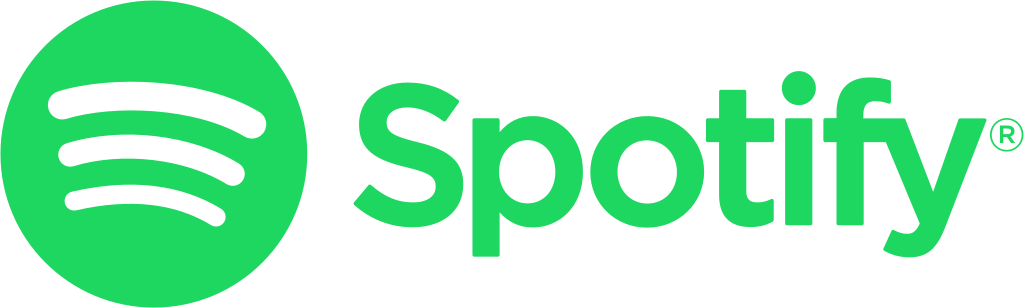

### **DEFINICIÓN PROBLEMA**

El objetivo que quiero es crear una playlist afín a mis gustors, con las canciones de más exito del momento.
Para ello, seguiré los siguientes pasos:
1. Obtención de los datos mediante web scrapping de Spotify Web.
2. Crear etiquetas para cada canción.


2. Obtener las listas/paises donde se alcanza mayor energia
3. Artistas más escuchados por pais ... recomendaciones para cada pais


#### DATA

In [4]:
# Libraries used

from bs4 import BeautifulSoup # for web scraping

import pandas as pd # for data manipulation and analysis

import pycountry # for accesing ISO databases of countries and languages

import requests # is used for making HTTP requests.


import spotipy #is a lightweight Python library for the Spotify Web API.

from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth # used for Spotify API authentication


### **GETTING DATA FROM SPOTIFY:**

#### 1. Requesting access to the Spotify API:

In [5]:
# Spotify client items:
client_id = "ef77e31c5d4049818901058b81bd56a3"
client_secret = "c773be9c070044e2ad067db5f86b62cb"
uri = "http://localhost:8080"

In [6]:
# Endpoint
token_url = "https://accounts.spotify.com/api/token"

# Parameters
data = {
    "grant_type": "client_credentials",
    "client_id": client_id,
    "client_secret": client_secret
}

# Make the POST request to obtain the access token
response = requests.post(token_url, data=data)

In [7]:
# Check if the request was successful
if response.status_code == 200:
    # Extract the access token from the response body
    access_token = response.json()["access_token"]
    print("Access token obtained:", access_token)
else:
    print("Failed to obtain access token. Status code:", response.status_code)

Access token obtained: BQAJzZydsKox7hArHbvkRZi1-oN6UoXK-RM8vKeFbS9N0BXOAl86F6sKHIrLsDWVJrNH4I6QHwNyx7LaE6QItfd5Lgn2VCvjXZYgZJPKRLwuwRhCRwo


From this moment on, I'm using the ``Spotipy`` library, which provides a Python interface for the Spotify Web API, facilitating interaction with the data and features provided by Spotify. The library allows access to a wide range of functionalities and comes with comprehensive documentation and usage examples that make learning and effective use easier.

In [8]:
# Initialize the Spotify authentication client
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Create a Spotify object, for  requesting
sp = spotipy.Spotify(auth_manager=auth_manager)

#### 2. List of countries:

``PyCountry`` is a useful tool for working with data related to countries in Python applications, providing a convenient way to access standardized information about countries, their codes, and other associated details."

In [9]:
# Obtain the data of countries
countries_data = list(pycountry.countries)

In [10]:
# Expample  for France:
print(f"Name: {countries_data[75].name} \nCode: {countries_data[75].alpha_2}")

Name: France 
Code: FR


In [11]:
# List of countries and list of codes
countries_names = [country.name for country in countries_data]
countries_codes = [country.alpha_2 for country in countries_data]

#### 3. Playlist_ids dataframe:

In [15]:
# Create an empty list to store the data
playlist_list = []
counter=0

# Iterate over each country
for name in countries_names:
    playlist_name = f"Top 50: {name}"

    # Perform the search for the playlist by its name
    results = sp.search(q=playlist_name, type='playlist')

    # Check if any playlists were found
    if results['playlists']['items']:
        # Iterate over each search result
        for item in results['playlists']['items']:
            # Check if the owner is Spotify
            if item['owner']['id'] == 'Spotify' or item['owner']['id'] == 'spotify':
                # Add the playlist data to the list
                playlist_list.append({
                    'country':name,
                    'playlist_id': item['id']
                })
                break  # Break the loop once a Spotify playlist is found
    else:
        # Print a message if no playlists were found for the country
        counter = counter + 1
        print("No playlist found with the name '{}' for country '{}'".format(playlist_name, name))
        print(f"Number of not found countries: {counter}")
        print("*"*20)



No playlist found with the name 'Top 50: Bermuda' for country 'Bermuda'
Number of not found countries: 1
********************
No playlist found with the name 'Top 50: Cayman Islands' for country 'Cayman Islands'
Number of not found countries: 2
********************
No playlist found with the name 'Top 50: Faroe Islands' for country 'Faroe Islands'
Number of not found countries: 3
********************
No playlist found with the name 'Top 50: Micronesia, Federated States of' for country 'Micronesia, Federated States of'
Number of not found countries: 4
********************
No playlist found with the name 'Top 50: Guam' for country 'Guam'
Number of not found countries: 5
********************
No playlist found with the name 'Top 50: Heard Island and McDonald Islands' for country 'Heard Island and McDonald Islands'
Number of not found countries: 6
********************
No playlist found with the name 'Top 50: Isle of Man' for country 'Isle of Man'
Number of not found countries: 7
***********

It seem that for small countries there are not playlist called "Top 50". 

``18 not found when collected data. ``


Every time I run this code cell, the number of countries not found varies... this may be because the playlist I'm searching for is being updated.

In [19]:
playlist_list[60:65]

[{'country': 'France', 'playlist_id': '37i9dQZEVXbIPWwFssbupI'},
 {'country': 'Gabon', 'playlist_id': '37i9dQZF1DX9lAYMw7KoAO'},
 {'country': 'United Kingdom', 'playlist_id': '37i9dQZEVXbLnolsZ8PSNw'},
 {'country': 'Georgia', 'playlist_id': '37i9dQZF1E8UaMeT1oDNDf'},
 {'country': 'Ghana', 'playlist_id': '37i9dQZF1DWSHg3zCMrBDf'}]

In [18]:
# Example for France:
france_pl_id = playlist_list[60]['playlist_id']

# Printing the playlist ID for France
print("Playlist ID for France:", france_pl_id)


Playlist ID for France: 37i9dQZEVXbIPWwFssbupI


Top 50: France --> playlist_id

<img src="./img/france_playlist_id.png" alt="France web Scrapping" width="1000" height="300">

In [12]:
def get_playlist_info(playlist_id):
    try:
        # Use the playlist() function from Spotipy to retrieve playlist information
        playlist_info = sp.playlist(playlist_id)
        return playlist_info
    except spotipy.SpotifyException as e:
        print("Error getting playlist information:", e)
        return None

In [20]:
# Example for France:
france_info = get_playlist_info(france_pl_id)
france_info

{'collaborative': False,
 'description': 'Your daily update of the most played tracks right now - France.',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZEVXbIPWwFssbupI'},
 'followers': {'href': None, 'total': 843900},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFssbupI?additional_types=track',
 'id': '37i9dQZEVXbIPWwFssbupI',
 'images': [{'height': None,
   'url': 'https://charts-images.scdn.co/assets/locale_en/regional/daily/region_fr_large.jpg',
   'width': None}],
 'name': 'Top 50 - France',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'NzY0Mjc0MDAwLDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbIPWwFssbupI/tracks?o

I need any funtion to take out the information --> followers and total songs

In [14]:
def get_playlist_data(playlist_id):
    playlist_info = get_playlist_info(playlist_id)
    if playlist_info:
        followers = playlist_info['followers']['total']
        total_songs = playlist_info['tracks']['total']
        return pd.Series({'followers': followers, 'total_songs': total_songs})
    else:
        return pd.Series({'followers': None, 'total_songs': None})

In [21]:
# Example for France:
france_info_processed = get_playlist_data(france_pl_id)
france_info_processed

followers      843900
total_songs        50
dtype: int64

In [16]:
# Create a DataFrame from the list of playlist data
playlist_data = []

# Iterate over playlist_list and extract required information
for playlist in playlist_list:
    country = playlist['country']
    playlist_id = playlist['playlist_id']
    info = get_playlist_data(playlist_id)

    playlist_data.append({'country': country,
                          'playlist_id': playlist_id,
                          'followers': info['followers'],
                          'total_songs': info['total_songs']})

# Create a DataFrame from the list of playlist data
playlist_df = pd.DataFrame(playlist_data)
playlist_df.sample(10)

,country,playlist_id,followers,total_songs
92,Japan,37i9dQZEVXbKXQ4mDTEBXq,1142146,50
156,Sudan,37i9dQZF1EIV2sImEXeA5I,0,50
139,Nepal,37i9dQZF1EIdaE58PbiN3T,0,50
134,Nigeria,37i9dQZEVXbKY7jLzlJ11V,21758,50
88,Italy,37i9dQZEVXbIQnj7RRhdSX,1068352,50
4,Argentina,37i9dQZEVXbMMy2roB9myp,1545224,50
136,Niue,37i9dQZEVXbM8SIrkERIYl,212377,50
110,Saint Martin (French part),37i9dQZF1DX0ZO4kBlpsIH,305150,104
44,Christmas Island,37i9dQZF1DX0A8zVl7p82B,2289779,90
85,"Iran, Islamic Republic of",37i9dQZF1DX95RTKCyCPUA,34709,31


#### 5. Artists dataframe:

In [24]:
def create_playlist_df(playlist_dataframe, country):
    playlist_id_series = playlist_dataframe.loc[playlist_dataframe['country'] == country]["playlist_id"]
    
    # Check if playlist_id_series is empty
    if playlist_id_series.empty:
        print("Playlist not found for the country:", country)
        return None
    
    playlist_id = playlist_id_series.iloc[0]  # Extract the playlist ID from the Series
    playlist_info = get_playlist_info(playlist_id)

    if not playlist_info:
        print("Error: Playlist information not found for ID:", playlist_id)
        return None
    
    tracks = playlist_info['tracks']['items']
    playlist_data = []

    for track in tracks:
        artist = track['track']['artists'][0]['name']
        album = track['track']['album']['name']
        song_name = track['track']['name']
        release_date = track['track']['album']['release_date']
        duration_ms = track['track']['duration_ms']
        popularity = track['track']['popularity']

        playlist_data.append({
            'Country': country,
            'Artist': artist,
            'Album': album,
            'Song_name': song_name,
            'Release_date': release_date,
            'Duration_ms': duration_ms,
            'Popularity': popularity
        })

    playlist_df = pd.DataFrame(playlist_data)
    return playlist_df

In [25]:
# Example for France:
france_df = create_playlist_df(playlist_df,"France")
france_df.head(10)

,Country,Artist,Album,Song_name,Release_date,Duration_ms,Popularity
0,France,Benson Boone,Beautiful Things,Beautiful Things,2024-01-18,180304,100
1,France,Jungeli,Petit génie,Petit génie,2023-08-04,217259,82
2,France,Gazo,LA MELO EST GANGX,MAMI WATA,2023-12-01,233240,79
3,France,Pierre Garnier,Ceux qu'on était,Ceux qu'on était,2024-02-07,174106,80
4,France,Teddy Swims,I've Tried Everything But Therapy (Part 1),Lose Control,2023-09-15,210688,93
5,France,Werenoi,Pyramide,Pyramide,2024-02-16,208405,77
6,France,Dadju,HÉRITAGE,I love you,2024-02-16,237866,69
7,France,Franglish,Prime,Position,2024-02-15,141226,73
8,France,iñigo quintero,Si No Estás,Si No Estás,2022-09-23,184061,90
9,France,Werenoi,Telegram 2,Tu connais,2023-09-21,169000,73


In [28]:
# All Artist dataframe:

# Create a list to store DataFrames of artists from each country
artist = []

# Iterate over each country in playlist_df["country"]
for country in playlist_df["country"]:
    # Get the DataFrame of artists for the current country
    artist_country_df = create_playlist_df(playlist_df, country)
    # Add the DataFrame to the list
    artist.append(artist_country_df)

# Concatenate the DataFrames of artists into one
artist_df = pd.concat(artist, ignore_index=True)

In [29]:
artist_df.sample(20)

,Country,Artist,Album,Song_name,Release_date,Duration_ms,Popularity
8036,Senegal,Mansour Seck,Yelayo,Sanu,1997-01-01,228800,3
46,Aruba,Emilia,.mp3,GTA.mp3,2023-11-03,151653,73
200,Argentina,FloyyMenor,Gata Only,Gata Only,2024-02-02,222000,93
6940,Niue,¥$,VULTURES 1,CARNIVAL,2024-02-09,264324,97
608,Belgium,Ariana Grande,eternal sunshine,"yes, and?",2024-03-08,214994,85
7791,Romania,Erika Isac,Macarena,Macarena,2024-02-14,146000,59
2885,Eritrea,Elsa Kidane,Belo (Eritrean Music),Newry Diyu,2013-06-19,449560,26
2034,Colombia,Feid,SIXDO,CHORRITO PA LAS ANIMAS,2022-12-02,168133,82
8383,Somalia,Ozuna,OzuTochi,Hey Mor,2022-10-07,196600,84
1143,Brazil,Dj Lc,A Internet É Toxica,A Internet É Toxica,2023-08-29,161884,77


In [30]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10376 entries, 0 to 10375
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       10376 non-null  object
 1   Artist        10376 non-null  object
 2   Album         10376 non-null  object
 3   Song_name     10376 non-null  object
 4   Release_date  10376 non-null  object
 5   Duration_ms   10376 non-null  int64 
 6   Popularity    10376 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 567.6+ KB


In [ ]:
** hasta mañana **

### otros


In [ ]:
def get_playlist_info(playlist_id):
    try:
        # Utiliza la función playlist() de Spotipy para obtener información de la playlist
        playlist_info = sp.playlist(playlist_id)
        return playlist_info
    except spotipy.SpotifyException as e:
        print("Error al obtener la información de la playlist:", e)
        return None


In [ ]:
# Función para buscar artistas
def search_artist(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist', limit=1)
    artist_details = {}
    if results['artists']['items']:
        artist = results['artists']['items'][0]
        artist_details["Nombre del artista"] = artist['name']
        artist_details["ID del artista"] = artist['id']
        artist_details["Géneros"] = ', '.join(artist['genres'])
        artist_details["Popularidad"] = artist['popularity']
    else:
        artist_details["Artista no encontrado"] = True

    return artist_details

In [ ]:
from bs4 import BeautifulSoup

# Fragmento de HTML proporcionado
html_text = '''
<div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">Oyentes mensuales</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Madrid, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">655.378&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Barcelona, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">401.181&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Valencia, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">171.566&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Santiago, CL</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">118.943&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Seville, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">117.551&nbsp;oyentes</div></div>
'''

# Parsear el HTML
soup = BeautifulSoup(html_text, 'html.parser')

# Encontrar todas las etiquetas <div> con la clase "Q_OUHp7iDNLBcO2ZYI2x"
ciudades_divs = soup.find_all('div', class_='Q_OUHp7iDNLBcO2ZYI2x')

# Crear un diccionario para almacenar la información
informacion_ciudades = {}

# Iterar sobre las etiquetas encontradas y extraer la información
for div in ciudades_divs:
    ciudad = div.find('div', class_='ksSRyh').text
    oyentes = div.find('div', class_='gYdBJW').text
    informacion_ciudades[ciudad] = oyentes

# Imprimir el diccionario de información de las ciudades
print(informacion_ciudades)

{'Madrid, ES': '655.378\xa0oyentes', 'Barcelona, ES': '401.181\xa0oyentes', 'Valencia, ES': '171.566\xa0oyentes', 'Santiago, CL': '118.943\xa0oyentes', 'Seville, ES': '117.551\xa0oyentes'}


In [ ]:
from bs4 import BeautifulSoup

# Fragmento de HTML proporcionado
html_text = '''
<div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">Oyentes mensuales</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Madrid, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">655.378&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Barcelona, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">401.181&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Valencia, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">171.566&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Santiago, CL</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">118.943&nbsp;oyentes</div></div><div class="Q_OUHp7iDNLBcO2ZYI2x"><div class="Text__TextElement-sc-if376j-0 ksSRyh encore-text-body-small-bold" data-encore-id="text">Seville, ES</div><div class="Text__TextElement-sc-if376j-0 gYdBJW encore-text-body-small" data-encore-id="text">117.551&nbsp;oyentes</div></div>
'''

# Parsear el HTML
soup = BeautifulSoup(html_text, 'html.parser')

# Datos del artista
artista_id = 12345  # ID del artista
nombre_artista = "Artista Ejemplo"
seguidores = "1,000,000"  # Seguidores del artista

# Encontrar todas las etiquetas <div> con la clase "Q_OUHp7iDNLBcO2ZYI2x"
ciudades_divs = soup.find_all('div', class_='Q_OUHp7iDNLBcO2ZYI2x')

# Crear un diccionario para almacenar la información de las ciudades
informacion_ciudades = {}

# Iterar sobre las etiquetas encontradas y extraer la información
for div in ciudades_divs:
    ciudad = div.find('div', class_='ksSRyh').text
    oyentes = div.find('div', class_='gYdBJW').text
    informacion_ciudades[ciudad] = int(oyentes.replace('\xa0oyentes', '').replace('.', ''))

# Ciudad donde reside el artista
ciudad_residencia = "Madrid, ES"

# Obtener la ciudad con más oyentes
ciudad_max_oyentes = max(informacion_ciudades, key=informacion_ciudades.get)

# Crear el diccionario con la información solicitada
informacion_artista = {
    "ID": artista_id,
    "Nombre": nombre_artista,
    "Seguidores": seguidores,
    "Oyentes mensuales": informacion_ciudades,
    "Ciudad residencia": ciudad_residencia,
    "Ciudad con más oyentes": ciudad_max_oyentes
}

# Imprimir el diccionario de información del artista
print(informacion_artista)


{'ID': 12345, 'Nombre': 'Artista Ejemplo', 'Seguidores': '1,000,000', 'Oyentes mensuales': {'Madrid, ES': 655378, 'Barcelona, ES': 401181, 'Valencia, ES': 171566, 'Santiago, CL': 118943, 'Seville, ES': 117551}, 'Ciudad residencia': 'Madrid, ES', 'Ciudad con más oyentes': 'Madrid, ES'}


In [ ]:
# Inicializa el objeto Spotify con las credenciales del cliente
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Crear una lista para almacenar los datos
data = []

# Iterar sobre todos los países disponibles en pycountry
for country in pycountry.countries:
    # Obtiene el código de país
    country_code = country.alpha_2
    
    # Verifica si el mercado está lanzado
    try:
        sp.search(q='a', type='artist', market=country_code, limit=1)
    except spotipy.SpotifyException as e:
        if e.http_status == 400 and e.code == -1 and "Unlaunched market" in e.msg:
            # Ignora el país si el mercado no está lanzado
            continue
    
    # Obtiene los 50 principales artistas del país
    top_artists = sp.search(q='a', type='artist', market=country_code, limit=50)
    
    # Iterar sobre los artistas y obtener las canciones más populares de cada uno
    for artist in top_artists['artists']['items']:
        artist_id = artist['id']
        
        # Obtiene las canciones más populares del artista
        top_tracks = sp.artist_top_tracks(artist_id)
        
        # Agrega las 20 canciones más populares del artista a la lista de datos
        for track in top_tracks['tracks'][:20]:
            data.append({'Country': country.name, 'Artist': artist['name'], 'Song': track['name'], 'Popularity': track['popularity']})

# Crea un DataFrame a partir de los datos
df = pd.DataFrame(data)

# Imprime el DataFrame con los resultados
print(df)


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'artist', 'market': 'AW'} returned 400 due to Unlaunched market
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'artist', 'market': 'AF'} returned 400 due to Unlaunched market
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'artist', 'market': 'AI'} returned 400 due to Unlaunched market
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'artist', 'market': 'AX'} returned 400 due to Unlaunched market
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'artist', 'market': 'AS'} returned 400 due to Unlaunched market
HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'a', 'limit': 1, 'offset': 0, 'type': 'a

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Inicializa el objeto Spotify con las credenciales del cliente
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Define el código de país o región para el cual deseas obtener los artistas principales
country_code = 'US'  # Cambia esto al código de país o región que desees

# Obtiene los 50 principales artistas del país o región especificado
top_artists = sp.artist_top_tracks(f'country:{country_code}')

# Imprime los artistas principales y sus canciones principales
for idx, artist in enumerate(top_artists['artists']):
    print(f"{idx + 1}: {artist['name']}")
    print("Top Tracks:")
    for track in artist['top_tracks']:
        print(f"- {track['name']}")
    print()

In [ ]:
top20 = sp.current_user_top_tracks(time_range='short_term', limit=20)
top20

{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2Wwiu1wnq1W8AMYbWuRFDH'},
      'href': 'https://api.spotify.com/v1/artists/2Wwiu1wnq1W8AMYbWuRFDH',
      'id': '2Wwiu1wnq1W8AMYbWuRFDH',
      'name': 'Arde Bogotá',
      'type': 'artist',
      'uri': 'spotify:artist:2Wwiu1wnq1W8AMYbWuRFDH'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
  

In [ ]:
for i, item in enumerate(top20['items']):
    print(i+1, item['name'], '//', item['artists'][0]['name'])

1 Qué Vida Tan Dura // Arde Bogotá
2 La Salvación // Arde Bogotá
3 Los Perros // Arde Bogotá
4 Exoplaneta // Arde Bogotá
5 Copilotos // Arde Bogotá
6 Abajo // Arde Bogotá
7 Cowboys de la A3 // Arde Bogotá
8 Cariño // Arde Bogotá
9 Clávame tus Palabras // Arde Bogotá
10 El Beso // Arde Bogotá
11 Nuestros Pecados // Arde Bogotá
12 Flor de la Mancha // Arde Bogotá
13 Todos Mis Amigos Están Tristes // Arde Bogotá
14 Veneno // Arde Bogotá
15 Escorpio y Sagitario // Arde Bogotá
16 Besos y Animales // Arde Bogotá
17 Antiaéreo // Arde Bogotá
18 Sin Vergüenza // Arde Bogotá
19 Tijeras // Arde Bogotá
20 Diosas y Copas // Chivi


In [ ]:
tracks = top20['items']
track_ids = []
track_names = []
features = []

for track in tracks:
    track_id = track['id']
    track_name = track['name']
    audio_features = sp.audio_features(track_id)
    
    track_ids.append(track_id)
    track_names.append(track_name)
    features.append(audio_features[0])

In [ ]:
top20_df = pd.DataFrame(features,index = track_names)

In [ ]:
top20_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Qué Vida Tan Dura,0.610,0.898,9,-3.736,1,0.0457,0.003040,0.000000,0.2930,0.536,74.983,audio_features,7pyilq0260Oo6cATaqsI7F,spotify:track:7pyilq0260Oo6cATaqsI7F,https://api.spotify.com/v1/tracks/7pyilq0260Oo...,https://api.spotify.com/v1/audio-analysis/7pyi...,203797,4
La Salvación,0.505,0.688,11,-5.556,1,0.0333,0.026400,0.000534,0.1070,0.308,159.913,audio_features,0txzIz1WcoAn6m07xypcD5,spotify:track:0txzIz1WcoAn6m07xypcD5,https://api.spotify.com/v1/tracks/0txzIz1WcoAn...,https://api.spotify.com/v1/audio-analysis/0txz...,263943,4
Los Perros,0.660,0.792,11,-4.403,0,0.0366,0.005820,0.000817,0.0929,0.532,96.992,audio_features,15zPjWfZ6eUFMaL4aD5Gp8,spotify:track:15zPjWfZ6eUFMaL4aD5Gp8,https://api.spotify.com/v1/tracks/15zPjWfZ6eUF...,https://api.spotify.com/v1/audio-analysis/15zP...,229877,4
Exoplaneta,0.452,0.721,7,-6.132,1,0.0310,0.021500,0.000603,0.1090,0.183,85.988,audio_features,68PEuXNjodWFts3Ph4BPVv,spotify:track:68PEuXNjodWFts3Ph4BPVv,https://api.spotify.com/v1/tracks/68PEuXNjodWF...,https://api.spotify.com/v1/audio-analysis/68PE...,232492,4
Copilotos,0.674,0.408,9,-10.148,0,0.0349,0.810000,0.000002,0.1770,0.252,104.104,audio_features,1ZauxvoFXtSDuWU1tOegSw,spotify:track:1ZauxvoFXtSDuWU1tOegSw,https://api.spotify.com/v1/tracks/1ZauxvoFXtSD...,https://api.spotify.com/v1/audio-analysis/1Zau...,152975,4
Abajo,0.535,0.904,10,-4.563,0,0.0470,0.000049,0.037000,0.0998,0.737,146.039,audio_features,45ucex4am8ru040h5mhxuo,spotify:track:45ucex4am8ru040h5mhxuo,https://api.spotify.com/v1/tracks/45ucex4am8ru...,https://api.spotify.com/v1/audio-analysis/45uc...,168479,4
Cowboys de la A3,0.601,0.793,11,-5.081,0,0.0362,0.007320,0.000001,0.0884,0.255,107.079,audio_features,2IhvR1T2uAbiSRWSoCWnxd,spotify:track:2IhvR1T2uAbiSRWSoCWnxd,https://api.spotify.com/v1/tracks/2IhvR1T2uAbi...,https://api.spotify.com/v1/audio-analysis/2Ihv...,276006,4
Cariño,0.595,0.825,9,-4.830,1,0.0455,0.000509,0.810000,0.1140,0.474,123.011,audio_features,7uWmMWEBGlBAm5B0oMpcs8,spotify:track:7uWmMWEBGlBAm5B0oMpcs8,https://api.spotify.com/v1/tracks/7uWmMWEBGlBA...,https://api.spotify.com/v1/audio-analysis/7uWm...,217128,4
Clávame tus Palabras,0.365,0.945,0,-4.513,1,0.0900,0.000360,0.000192,0.1550,0.725,153.855,audio_features,6ptkHIi8kWjHOtpT68HIYZ,spotify:track:6ptkHIi8kWjHOtpT68HIYZ,https://api.spotify.com/v1/tracks/6ptkHIi8kWjH...,https://api.spotify.com/v1/audio-analysis/6ptk...,208971,4
El Beso,0.495,0.781,4,-5.887,1,0.0416,0.001290,0.059100,0.1130,0.464,118.076,audio_features,325R4okpFnhCZ8guXOH0Ah,spotify:track:325R4okpFnhCZ8guXOH0Ah,https://api.spotify.com/v1/tracks/325R4okpFnhC...,https://api.spotify.com/v1/audio-analysis/325R...,190334,4


In [ ]:
ids_artists = []
print('Artistas en mi top20:')
print('=====================')
for item in top20['items']:
    artist_id = item['artists'][0]['id']
    artist_name = item['artists'][0]['name']
    print(f'{artist_id}: {artist_name}')
    ids_artists.append(artist_id)

Artistas en mi top20:
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2Wwiu1wnq1W8AMYbWuRFDH: Arde Bogotá
2bKySOuviZxzwqrxu7Xq0w: Chivi


In [ ]:
ids_artists = list(set(ids_artists))
print(f'Número de artistas (sin repeticiones): {len(ids_artists)}')

Número de artistas (sin repeticiones): 2


In [ ]:
print('Artistas similares:')
print('=====================')
ids_similar_artists = []
for artist_id in ids_artists:
    artists = sp.artist_related_artists(artist_id)['artists']
    for item in artists:
        artist_id = item['id']
        artist_name = item['name']
        print(f'{artist_id}: {artist_name}')
        ids_similar_artists.append(artist_id)

Artistas similares:
57s0ep3eNSg81D7ZxiuHbC: Viva Suecia
6rRTrEHzGSDqhmFJQrNFMO: Shinova
5q3atpVIFpXkHlcOKyK0H4: Siloé
4H3BAAfpEcLHQkaQKfvoW8: Mikel Izal
7JrMDzLZQ25BJwc4tD8jl8: ELYELLA
2k60o7SVpOKmzpuTEAG3L8: Veintiuno
2FN1YrHU65dhPZKl3GD7Vd: Sexy Zebras
3Ju3bW8OaeUmfQKqMtATKr: Second
3wcfgYTtdxmXrhuUuq3kEe: Carmen 113
7wItEsGHPEaFKnb1iJhbmW: Niña Polaca
1vBn5Puz4mdZopZEHq1QDq: La Maravillosa Orquesta del Alcohol
3mOsjj1MhocRVwOejIZlTi: Lori Meyers
61C3cEhdoJ9YiQSQSwYB4K: Supersubmarina
2hazSY4Ef3aB9ATXW7F5w3: IZAL
5Q30fhTc0Sl0Q4C5dOjhhQ: La La Love You
1uvhwixGrZkuT2gpQQWgYb: Miss Caffeina
2pMVWkucVS130nJx59uAEa: Sidonie
5w3bs8jNvbb0QHf5Lo0sva: Ginebras
1x6i8bPtzYRUWm4YVA6K5i: Ciudad Jara
6kkQkBRrPcQGUN8g2grxwb: Varry Brava
7pv5UpufWuB0uUXYUhulwA: Juampa
5kebWU4S5zMprNG6WfOKwo: Mama Ladilla
61sCtal02aLMyfxG9bA6yZ: El Reno Renardo
68FK4zIoGBV9lbaM3kxmZr: Gigatron
2JYplyjta0sWo4NhpTotZR: Los gandules
6tRCwMcZIVfCuUmnKyf9rR: Gigatrón
41vHguv5A56arhiVNrMW4z: Mojinos Escozios
0mCVBnmmGLp7t

In [ ]:
ids_artists.extend(ids_similar_artists)

In [ ]:
ids_artists = list(set(ids_artists))
print(f'Número de artistas (sin repeticiones): {len(ids_artists)}')

Número de artistas (sin repeticiones): 42


In [ ]:
new_releases = sp.new_releases(limit=20)['albums']

In [ ]:
print('')
print('Artistas con nuevos lanzamientos:')
print('=====================')
for item in new_releases['items']:
    artist_id = item['artists'][0]['id']   #[0] porque puede haber varios artistas, se tomará el primero
    artist_name = item['artists'][0]['name']
    album_name = item['name']   # Nombre del album, puramente informativo
    release_date = item['release_date'] # Fecha de lanzamiento, puramente informativo
    print(f'{artist_id}: {artist_name} - // {album_name}, {release_date}')
    ids_artists.append(artist_id)


Artistas con nuevos lanzamientos:
1Mw40k757jZuiL0NIJpdO5: GULEED - // Cuando Menos Lo Espera, 2023-07-07
6k8mwkKJKKjBILo7ypBspl: Ana Mena - // bellodrama, 2023-03-24
7iK8PXO48WeuP03g8YR51W: Myke Towers - // LA VIDA ES UNA, 2023-03-23
5XJDexmWFLWOkjOEjOVX3e: Eladio Carrion - // 3MEN2 KBRN, 2023-03-17
790FomKkXshlbRYZFtlgla: KAROL G - // MAÑANA SERÁ BONITO, 2023-02-24
2auC28zjQyVTsiZKNgPRGs: RM - // Indigo, 2022-12-02
6KImCVD70vtIoJWnq6nGn3: Harry Styles - // Harry's House, 2022-05-20
4q3ewBCX7sLwd24euuV69X: Bad Bunny - // Un Verano Sin Ti, 2022-05-06
2R21vXR83lH98kGeO99Y66: Anuel AA - // Las Leyendas Nunca Mueren, 2021-11-26
4dpARuHxo51G3z768sgnrY: Adele - // 30, 2021-11-19
6eUKZXaKkcviH0Ku9w2n3V: Ed Sheeran - // =, 2021-10-29
4gzpq5DPGxSnKTe4SA8HAU: Coldplay - // Music Of The Spheres, 2021-10-15
53KwLdlmrlCelAZMaLVZqU: James Blake - // Friends That Break Your Heart, 2021-10-08
4MzJMcHQBl9SIYSjwWn8QW: Spiritbox - // Eternal Blue, 2021-09-17
1vyhD5VmyZ7KMfW5gqLgo5: J Balvin - // JOSE, 2

In [ ]:
ids_artists = list(set(ids_artists))
print(f'Número de artistas (sin repeticiones): {len(ids_artists)}')

Número de artistas (sin repeticiones): 62


In [ ]:
id_albums = []
nartists = len(ids_artists)
for i, id_artist in enumerate(ids_artists):
    print(f'Procesando artista {i+1} de {nartists}...')
    albums = sp.artist_albums(id_artist, limit=1) # para evitar tener una lista gigantesca
    for album in albums['items']:
        id_albums.append(album['id'])
print('¡Listo!')

Procesando artista 1 de 62...
Procesando artista 2 de 62...
Procesando artista 3 de 62...
Procesando artista 4 de 62...
Procesando artista 5 de 62...
Procesando artista 6 de 62...
Procesando artista 7 de 62...
Procesando artista 8 de 62...
Procesando artista 9 de 62...
Procesando artista 10 de 62...
Procesando artista 11 de 62...
Procesando artista 12 de 62...
Procesando artista 13 de 62...
Procesando artista 14 de 62...
Procesando artista 15 de 62...
Procesando artista 16 de 62...
Procesando artista 17 de 62...
Procesando artista 18 de 62...
Procesando artista 19 de 62...
Procesando artista 20 de 62...
Procesando artista 21 de 62...
Procesando artista 22 de 62...
Procesando artista 23 de 62...
Procesando artista 24 de 62...
Procesando artista 25 de 62...
Procesando artista 26 de 62...
Procesando artista 27 de 62...
Procesando artista 28 de 62...
Procesando artista 29 de 62...
Procesando artista 30 de 62...
Procesando artista 31 de 62...
Procesando artista 32 de 62...
Procesando artist

In [ ]:
track_names = []
features = []
ntracks = len(id_tracks)
for i, track_id in enumerate(id_tracks):
    print(f'Procesando track {i+1} de {ntracks}...')
    track_name = sp.track(track_id)['name']
    audio_features = sp.audio_features(track_id)
    
    #No incluir pistas sin "features"
    if audio_features[0] != None:
        track_names.append(track_name)
        features.append(audio_features[0])
print('¡Listo!')

candidatos_df = pd.DataFrame(features,index = track_names)

Procesando track 1 de 186...
Procesando track 2 de 186...
Procesando track 3 de 186...
Procesando track 4 de 186...
Procesando track 5 de 186...
Procesando track 6 de 186...
Procesando track 7 de 186...
Procesando track 8 de 186...
Procesando track 9 de 186...
Procesando track 10 de 186...
Procesando track 11 de 186...
Procesando track 12 de 186...
Procesando track 13 de 186...
Procesando track 14 de 186...
Procesando track 15 de 186...
Procesando track 16 de 186...
Procesando track 17 de 186...
Procesando track 18 de 186...
Procesando track 19 de 186...
Procesando track 20 de 186...
Procesando track 21 de 186...
Procesando track 22 de 186...
Procesando track 23 de 186...
Procesando track 24 de 186...
Procesando track 25 de 186...
Procesando track 26 de 186...
Procesando track 27 de 186...
Procesando track 28 de 186...
Procesando track 29 de 186...
Procesando track 30 de 186...
Procesando track 31 de 186...
Procesando track 32 de 186...
Procesando track 33 de 186...
Procesando track 34